In [1]:
import pandas as pd
import numpy as np

In [2]:
# data = download then read the excel file in the teams folder- called exchange rate data
data = pd.read_excel("C:/Users/Kavita manoj/Downloads/Exchange rate data (1).xlsx", index_col=0)

In [3]:
data.head()

,US Dollar,Pound Sterling,Euro,Japanese Yen
Date,,,,
2022-10-07,82.4000,91.6942,80.5460,56.82
2022-10-06,81.7044,92.5221,80.9603,56.53
2022-10-04,81.4267,92.4714,80.2677,56.22
2022-10-03,81.7417,91.8106,80.2409,56.41
2022-09-30,81.5522,90.7703,80.1093,56.44


In [4]:
usd = data['US Dollar']

In [5]:
usd

Date
2022-10-07    82.4000
2022-10-06    81.7044
2022-10-04    81.4267
2022-10-03    81.7417
2022-09-30    81.5522
               ...   
1999-01-08    42.5206
1999-01-07    42.5206
1999-01-06    42.5098
1999-01-05    42.5604
1999-01-04    42.5098
Name: US Dollar, Length: 5752, dtype: float64

<AxesSubplot:xlabel='Date'>

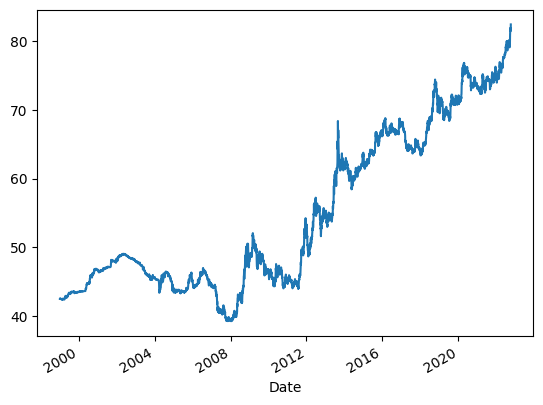

In [6]:
usd.plot()

In [7]:
usd_monthly = usd.resample('M').mean()

In [8]:
usd_monthly

Date
1999-01-31    42.508667
1999-02-28    42.460444
1999-03-31    42.447432
1999-04-30    42.726994
1999-05-31    42.770924
                ...    
2022-06-30    78.074577
2022-07-31    79.601552
2022-08-31    79.555047
2022-09-30    80.231555
2022-10-31    81.818200
Freq: M, Name: US Dollar, Length: 286, dtype: float64

<AxesSubplot:xlabel='Date'>

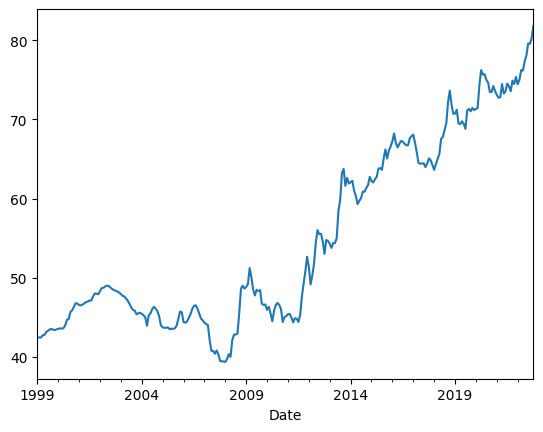

In [9]:
usd_monthly.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(usd_monthly, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [11]:
dfoutput

Test Statistic                   0.474812
p-value                          0.984087
#lags-used                       1.000000
number-of-observations-used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

In [12]:
usd_monthly_log = np.log(usd_monthly)

In [13]:
dftest = adfuller(usd_monthly_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [14]:
dfoutput

Test Statistic                  -0.059443
p-value                          0.953331
#lags-used                       1.000000
number-of-observations-used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64

In [15]:
shifted = usd_monthly_log.shift(1)
usd_monthly_log_diff = usd_monthly_log - shifted
usd_monthly_log_diff.dropna(inplace=True)

In [16]:
dftest = adfuller(usd_monthly_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [17]:
dfoutput

Test Statistic                -1.252181e+01
p-value                        2.538706e-23
#lags-used                     0.000000e+00
number-of-observations-used    2.840000e+02
Critical Value (1%)           -3.453587e+00
Critical Value (5%)           -2.871771e+00
Critical Value (10%)          -2.572222e+00
dtype: float64

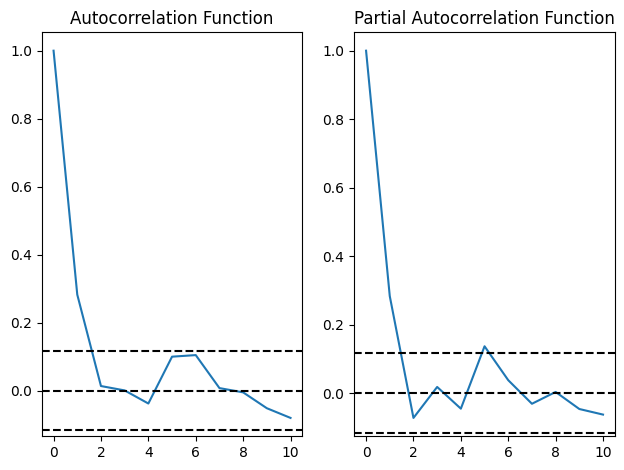

In [18]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf
import matplotlib.pyplot as plt
lag_auto_corr = acf(usd_monthly_log_diff, nlags=10)
lag_par_auto_corr = pacf(usd_monthly_log_diff, nlags=10, method='ols')

 

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(usd_monthly_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(usd_monthly_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

 

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(usd_monthly_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(usd_monthly_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
usd_monthly_log_diff_reshaped = usd_monthly_log_diff.values.reshape(-1)

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


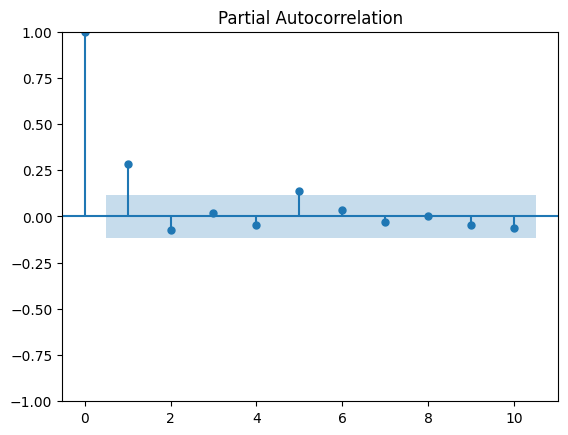

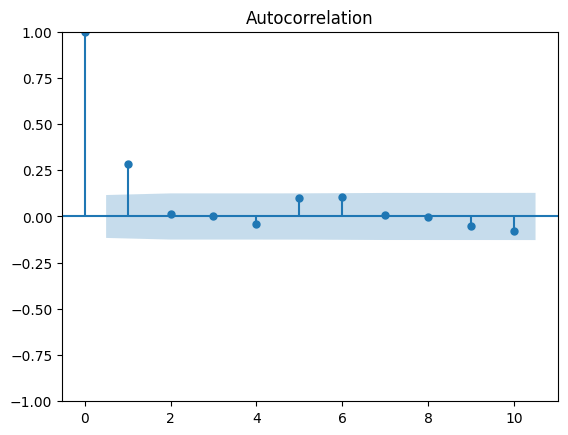

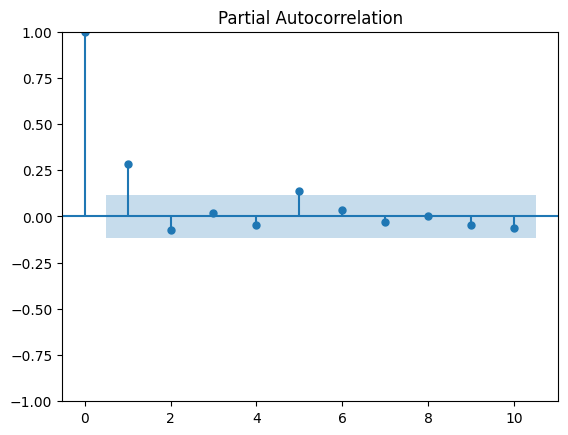

In [20]:
plot_acf(usd_monthly_log_diff_reshaped, lags=10)
plot_pacf(usd_monthly_log_diff_reshaped, lags=10)

In [21]:
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(usd_monthly_log_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              US Dollar   No. Observations:                  285
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 779.400
Date:                Mon, 09 Oct 2023   AIC                          -1552.799
Time:                        14:51:21   BIC                          -1541.852
Sample:                    02-28-1999   HQIC                         -1548.410
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2868      0.044      6.550      0.000       0.201       0.373
ma.L1         -0.9993      0.142     -7.037      0.000      -1.278      -0.721
sigma2         0.0002   3.42e-05      6.947      0.0

In [22]:
model = ARIMA(usd_monthly_log_diff, order=(0, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              US Dollar   No. Observations:                  285
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 767.343
Date:                Mon, 09 Oct 2023   AIC                          -1530.686
Time:                        14:51:21   BIC                          -1523.388
Sample:                    02-28-1999   HQIC                         -1527.760
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9914      0.013    -75.082      0.000      -1.017      -0.966
sigma2         0.0003   1.42e-05     18.229      0.000       0.000       0.000
Ljung-Box (L1) (Q):                  22.42   Jarque-

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.0740')

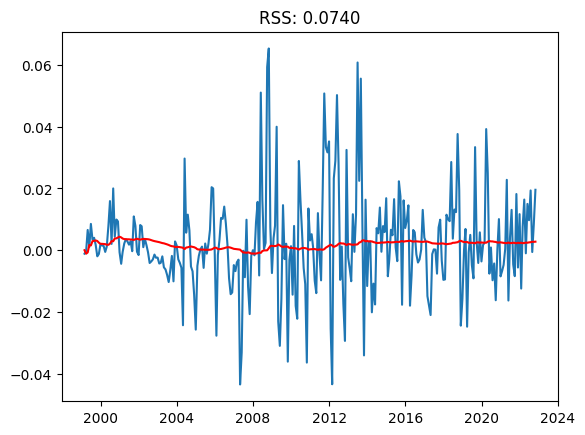

In [23]:
plt.plot(usd_monthly_log_diff.index.to_pydatetime(), usd_monthly_log_diff.values)
plt.plot(usd_monthly_log_diff.index.to_pydatetime(), model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-usd_monthly_log_diff)**2))